In [1]:
import math
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time
import random
import openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from openpyxl import load_workbook

In [2]:
df = pd.read_csv('KT_Sita.csv')
df1 = pd.read_csv('B_Sita.csv')
df2 = pd.read_csv('SW_line_Sita.csv')
df3 = pd.read_csv('SW_smooth_Sita.csv')
df4 = pd.read_csv('MS_Sita.csv')
df5 = pd.read_csv('TW_sita.csv')

In [3]:
def SvmRfc(df):   
    df1 = df[df.face==0].reset_index(drop=True)
    df2 = df[df.face==1].reset_index(drop=True)
    df2 = pd.DataFrame.sample(df2,n=len(df1),random_state=1).reset_index(drop=True)
    df3 = pd.concat([df1,df2]).reset_index(drop=True) 
    data = df3.drop(labels=['frame','face'],axis=1).values
    target = df3.face.values

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)


    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    #n_samples, n_features = X_train.shape
    #print('X_train:',n_samples)
    #print('x_test:',len(y_test))
    #print('feature:',n_features)
    #print(X_train[0,:])
    #print('train+test:',(len(X_train)+len(X_test)))
    #print('data:',len(data))

    ##SVM
    print("svm\n")
    svc_model = svm.SVC(gamma='auto', C=30, kernel='rbf',probability=True)

    start = time.time()
    svc_model.fit(X_train, y_train)
    end = time.time() - start
    #print("time of tain is\n",end)
    print("score of train",svc_model.score(X_train,y_train))

    #使用K折交叉驗證模組
    #start = time.time()
    #scores = cross_val_score(svc_model, X_train, y_train, cv=10, scoring='accuracy')
    #end = time.time() - start
    #print("time of val is\n",end)
    #print(scores)
    #print("score of val :",scores.mean())

    ##test of svm
    svc_pred = svc_model.predict(X_test)
    print("score of test :",svc_model.score(X_test, y_test))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    print("\n")

    ##RFC
    print("RFC\n")
    rfc = RandomForestClassifier(n_estimators = 40,
     max_depth = 20,
     max_features='auto',
     min_samples_leaf = 1,
     min_samples_split = 4)

    #從訓練組資料中建立隨機森林模型
    #start = time.time()
    rfc.fit(X_train,y_train)
    #end = time.time() - start
    #print("time of train is\n",end)
    print("score of train",rfc.score(X_train,y_train))



    #使用K折交叉驗證模組
    #start = time.time()
    depth_range=range(21,101)
    cv_scores = []
    for n in depth_range:
        rfc.max_depth=n
        scores = cross_val_score(rfc,X_train, y_train, cv=5,scoring='accuracy')
        cv_scores.append(scores.mean())
    #end = time.time() - start
    #print("time of val is\n",end)
    #print(scores)
    #print("score of val :",scores.mean())

    plt.plot(depth_range,cv_scores)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')		#通过图像选择最好的参数
    plt.show()
    
    #test of rfc
    rfc_pred = rfc.predict(X_test)
    print("score of test :",rfc.score(X_test, y_test))
    print(confusion_matrix(y_test,rfc_pred))

    #利用classification report來看precision、recall、f1-score、support
    print(classification_report(y_test,rfc_pred))

svm

score of train 0.9125929861849097
score of test : 0.8884758364312267
[[727 108]
 [ 72 707]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       835
           1       0.87      0.91      0.89       779

    accuracy                           0.89      1614
   macro avg       0.89      0.89      0.89      1614
weighted avg       0.89      0.89      0.89      1614



RFC

score of train 0.997874601487779


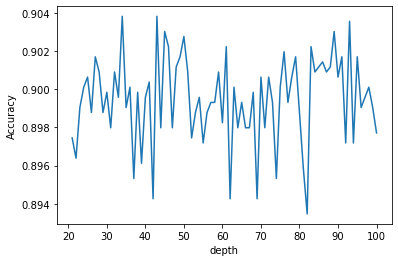

score of test : 0.9089219330855018
[[752  83]
 [ 64 715]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       835
           1       0.90      0.92      0.91       779

    accuracy                           0.91      1614
   macro avg       0.91      0.91      0.91      1614
weighted avg       0.91      0.91      0.91      1614



In [4]:
SvmRfc(df)

svm

score of train 0.886252843678908
score of test : 0.8483699772554966
[[564 122]
 [ 78 555]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       686
           1       0.82      0.88      0.85       633

    accuracy                           0.85      1319
   macro avg       0.85      0.85      0.85      1319
weighted avg       0.85      0.85      0.85      1319



RFC

score of train 0.9987000324991875


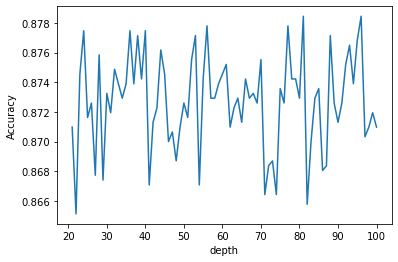

score of test : 0.8794541319181198
[[597  89]
 [ 70 563]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       686
           1       0.86      0.89      0.88       633

    accuracy                           0.88      1319
   macro avg       0.88      0.88      0.88      1319
weighted avg       0.88      0.88      0.88      1319



In [5]:
SvmRfc(df1)

svm

score of train 0.9115549215406562
score of test : 0.8172757475083057
[[123  27]
 [ 28 123]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       150
           1       0.82      0.81      0.82       151

    accuracy                           0.82       301
   macro avg       0.82      0.82      0.82       301
weighted avg       0.82      0.82      0.82       301



RFC

score of train 0.9985734664764622


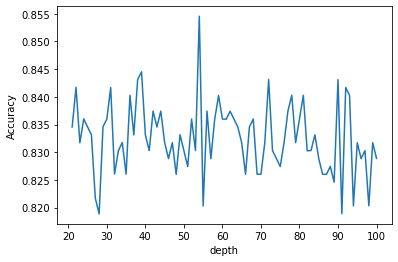

score of test : 0.8372093023255814
[[126  24]
 [ 25 126]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       150
           1       0.84      0.83      0.84       151

    accuracy                           0.84       301
   macro avg       0.84      0.84      0.84       301
weighted avg       0.84      0.84      0.84       301



In [6]:
SvmRfc(df2)

svm

score of train 0.8870151770657673
score of test : 0.8394964594807238
[[542 120]
 [ 84 525]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       662
           1       0.81      0.86      0.84       609

    accuracy                           0.84      1271
   macro avg       0.84      0.84      0.84      1271
weighted avg       0.84      0.84      0.84      1271



RFC

score of train 0.9976391231028667


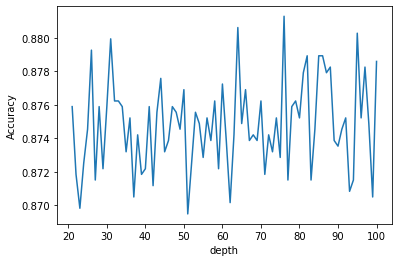

score of test : 0.8764752163650669
[[568  94]
 [ 63 546]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       662
           1       0.85      0.90      0.87       609

    accuracy                           0.88      1271
   macro avg       0.88      0.88      0.88      1271
weighted avg       0.88      0.88      0.88      1271



In [7]:
SvmRfc(df3)

svm

score of train 0.9050678087080657
score of test : 0.8252911813643927
[[256  51]
 [ 54 240]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       294

    accuracy                           0.83       601
   macro avg       0.83      0.83      0.83       601
weighted avg       0.83      0.83      0.83       601



RFC

score of train 0.9992862241256245


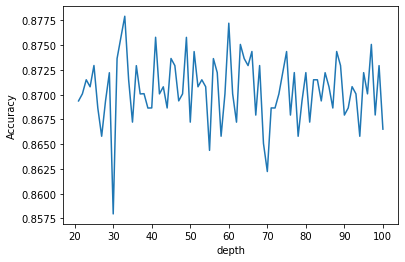

score of test : 0.8668885191347754
[[278  29]
 [ 51 243]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       307
           1       0.89      0.83      0.86       294

    accuracy                           0.87       601
   macro avg       0.87      0.87      0.87       601
weighted avg       0.87      0.87      0.87       601



In [8]:
SvmRfc(df4)

svm

score of train 0.9134973900074571
score of test : 0.8660869565217392
[[237  53]
 [ 24 261]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       290
           1       0.83      0.92      0.87       285

    accuracy                           0.87       575
   macro avg       0.87      0.87      0.87       575
weighted avg       0.87      0.87      0.87       575



RFC

score of train 0.9977628635346756


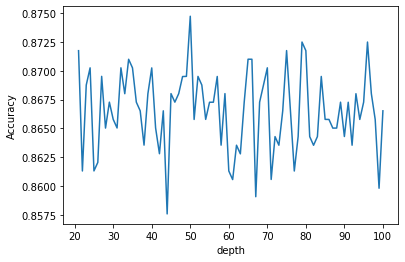

score of test : 0.9113043478260869
[[255  35]
 [ 16 269]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       290
           1       0.88      0.94      0.91       285

    accuracy                           0.91       575
   macro avg       0.91      0.91      0.91       575
weighted avg       0.91      0.91      0.91       575



In [9]:
SvmRfc(df5)

svm

score of train 0.8428797826579126
score of test : 0.8145800316957211
[[2254  591]
 [ 462 2372]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2845
           1       0.80      0.84      0.82      2834

    accuracy                           0.81      5679
   macro avg       0.82      0.81      0.81      5679
weighted avg       0.82      0.81      0.81      5679



RFC

score of train 0.9944909818126934


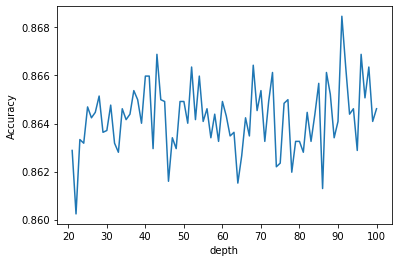

score of test : 0.8649410107413277
[[2401  444]
 [ 323 2511]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2845
           1       0.85      0.89      0.87      2834

    accuracy                           0.86      5679
   macro avg       0.87      0.86      0.86      5679
weighted avg       0.87      0.86      0.86      5679



In [10]:
df6 = pd.concat([df,df1,df2,df3,df4,df5]).reset_index(drop=True) 
SvmRfc(df6)